In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
data = pd.read_csv('cardio_dataset.csv')
data.head()

,SEX,AGEIR,TC,HDL,SMOKE_,BPMED,DIAB_01,RISK
0,1,48,236,66,0,1,0,1.1
1,0,48,260,51,0,1,1,7.0
2,0,44,187,49,1,1,0,7.0
3,1,42,216,57,1,1,0,0.4
4,1,56,156,42,0,1,0,2.2


In [5]:
x = data.drop('RISK', axis=1)
y = data['RISK'] 

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

y = np.reshape(y, (-1, 1))

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# scaler for X
x_scaler = MinMaxScaler()
x_train = x_scaler.fit_transform(x_train)
x_test  = x_scaler.transform(x_test)

# scaler for y
y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train)
y_test  = y_scaler.transform(y_test)


In [ ]:
import keras.models as sequential
import keras.layers as layers
import keras.optimizers as optimizers
from keras.layers import Dropout

model = sequential.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(7,)))
model.add(Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(1, activation='linear'))

model.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mae"]   # or use "mse" too
)



e:\Ai\Deep_Learning\regression\venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,393 (44.50 KB)

 Trainable params: 11,393 (44.50 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
history = model.fit(
    x_train, y_train,
    epochs=200,
    validation_data=(x_test, y_test)
)

Epoch 1/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0134 - mae: 0.0754 - val_loss: 0.0046 - val_mae: 0.0408
Epoch 2/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0060 - mae: 0.0497 - val_loss: 0.0039 - val_mae: 0.0386
Epoch 3/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0051 - mae: 0.0449 - val_loss: 0.0041 - val_mae: 0.0374
Epoch 4/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0051 - mae: 0.0450 - val_loss: 0.0038 - val_mae: 0.0382
Epoch 5/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0048 - mae: 0.0433 - val_loss: 0.0038 - val_mae: 0.0371
Epoch 6/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0045 - mae: 0.0428 - val_loss: 0.0039 - val_mae: 0.0370
Epoch 7/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0047 - mae: 0.0427 - val_loss: 0.0057 - val_mae: 0.0446
Epoch 8/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0044 - mae: 0.0426 - val_loss: 0.0035 - val_mae: 0.0362
Epoch 9/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(x_test)

print("MSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("R2: ", r2_score(y_test, y_pred))

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MSE:  0.0033766791330160266
MAE:  0.03367206790108095
R2:  0.8576629700542622


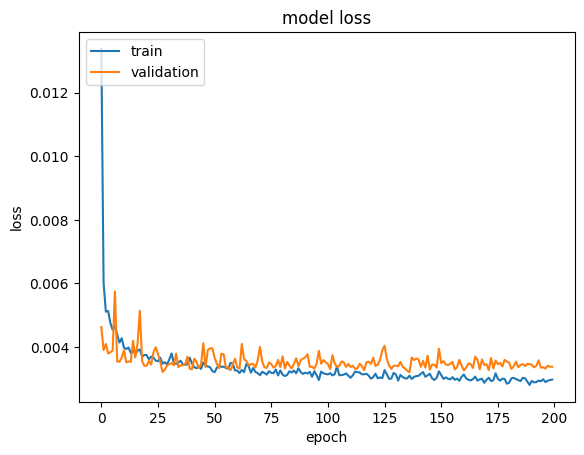

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [53]:
from sklearn.metrics import r2_score
import keras

class customCallback(keras.callbacks.Callback):

    def on_epoch_end(self, epoch, logs=None):
        predicted_result = model.predict(x_test)
        r2 = r2_score(y_test, predicted_result)
        print('epoch', epoch, 'R2: ', r2)


In [54]:
import os
from keras.callbacks import ModelCheckpoint

os.makedirs("models", exist_ok=True)

checkpoint = ModelCheckpoint(
    filepath="models/model-{epoch:03d}.keras",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
    verbose=1
)


In [55]:
history = model.fit(
    x_train, y_train,
    epochs=200,
    validation_data=(x_test, y_test),
    callbacks=[checkpoint]
)

Epoch 1/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0028 - mae: 0.0348
Epoch 1: val_loss improved from None to 0.00352, saving model to models/model-001.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0028 - mae: 0.0351 - val_loss: 0.0035 - val_mae: 0.0347
Epoch 2/200
157/167 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030 - mae: 0.0357
Epoch 2: val_loss improved from 0.00352 to 0.00337, saving model to models/model-002.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0030 - mae: 0.0356 - val_loss: 0.0034 - val_mae: 0.0353
Epoch 3/200
165/167 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mae: 0.0346
Epoch 3: val_loss did not improve from 0.00337
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0028 - mae: 0.0348 - val_loss: 0.0036 - val_mae: 0.0369
Epoch 4/200
160/167 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0030 - mae: 0.0358
Epoch 4: val_loss did not improve from 0.00337
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0030 - mae: 0.0358 - val_l

In [56]:
import joblib 

joblib.dump(x_scaler, 'x_scaler.joblib')
joblib.dump(y_scaler, 'y_scaler.joblib')

['y_scaler.joblib']